In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
sess = tf.Session()

In [3]:
from tensorflow.python.framework import ops

In [4]:
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))

In [11]:
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [12]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor), b)
sol1 = tf.matrix_solve(L, tA_b)
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

In [14]:
solution_eval = sess.run(sol2)
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: {}, y_intercept: {}'.format(str(slope), str(y_intercept)))

slope: 1.015391206807138, y_intercept: -0.17310656345942604


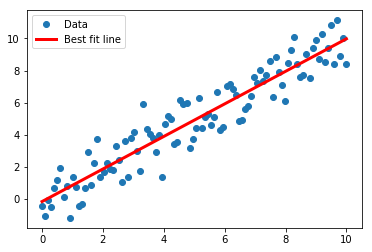

In [15]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()